**Team**
*   **Karan Bhatt**
*   **Abha Rani**


**Problem Statement:**
Income inequality - when income is distributed in an uneven manner among a population - is a growing problem in developing nations across the world. With the rapid rise of AI and worker automation, this problem could continue to grow if steps are not taken to address the issue.


---

[umojahack](https://zindi.africa/competitions/umojahack-india-2022)

---



**The objective of this challenge is to create a machine learning model to predict whether an individual earns above or below a certain amount.**

---



This solution can potentially reduce the cost and improve the accuracy of monitoring key population indicators such as income level in between census years. This information will help policymakers to better manage and avoid income inequality globally.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install --upgrade scikit-learn numpy pandas catboost 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [ ]:
from termcolor import colored
import plotly.express as px
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
import warnings
warnings.filterwarnings('always') 

In [ ]:
import lightgbm
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.7/dist-packages/lightgbm/__init__.py:30: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/lightgbm/VERSION.txt' mode='r' encoding='UTF-8'>
  __version__ = open(os.path.join(dir_path, 'VERSION.txt')).read().strip()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
force_remount=True

In [ ]:
file_ = "drive/MyDrive/ColabNotebooks/Test.csv"

test_data = pd.read_csv(file_)
test_data.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


In [ ]:
file_ = "drive/MyDrive/ColabNotebooks/Train.csv"

train_data = pd.read_csv(file_)
train_data.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [ ]:
train_data.count()

ID                                209499
age                               209499
gender                            209499
education                         209499
class                             104254
education_institute                13302
marital_status                    209499
race                              209499
is_hispanic                       209499
employment_commitment             209499
unemployment_reason                 6520
employment_stat                   209499
wage_per_hour                     209499
is_labor_union                     20079
working_week_per_year             209499
industry_code                     209499
industry_code_main                209499
occupation_code                   209499
occupation_code_main              103805
total_employed                    209499
household_stat                    209499
household_summary                 209499
under_18_family                    57845
veterans_admin_questionnaire        2084
vet_benefit     

In [ ]:
test_data.groupby('race').total_employed.sum()

race
 Amer Indian Aleut or Eskimo      1646
 Asian or Pacific Islander        5301
 Black                           17018
 Other                            2719
 White                          148975
Name: total_employed, dtype: int64

In [ ]:
test_data.citizenship.unique()

array(['Native', ' Foreign born- Not a citizen of U S ',
       ' Native- Born in Puerto Rico or U S Outlying',
       ' Foreign born- U S citizen by naturalization',
       ' Native- Born abroad of American Parent(s)'], dtype=object)

In [ ]:
test_data.country_of_birth_father.unique()

array(['US', ' El-Salvador', ' Nicaragua', ' ?', ' China', ' Mexico',
       ' Philippines', ' Germany', ' Italy', ' England',
       ' Dominican-Republic', ' Outlying-U S (Guam USVI etc)', ' Vietnam',
       ' Puerto-Rico', ' Poland', ' India', ' Hungary', ' Canada',
       ' Cuba', ' Scotland', ' Portugal', ' France', ' Columbia',
       ' Guatemala', ' Ecuador', ' Jamaica', ' Peru', ' Trinadad&Tobago',
       ' South Korea', ' Yugoslavia', ' Cambodia', ' Japan', ' Greece',
       ' Haiti', ' Iran', ' Honduras', ' Ireland', ' Panama', ' Thailand',
       ' Taiwan', ' Hong Kong', ' Laos', ' Holand-Netherlands'],
      dtype=object)

In [ ]:
test_data.groupby('race').wage_per_hour.max()

race
 Amer Indian Aleut or Eskimo    7700
 Asian or Pacific Islander      2700
 Black                          2800
 Other                          2019
 White                          9400
Name: wage_per_hour, dtype: int64

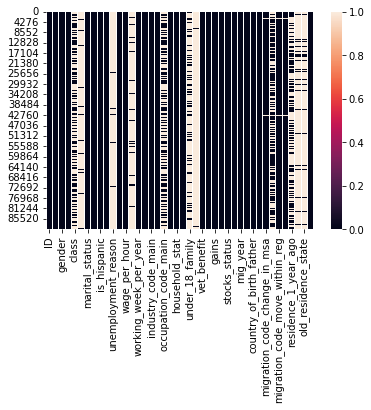

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(test_data.isnull())
plt.show()

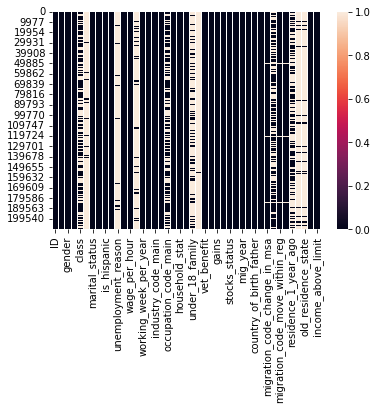

In [ ]:
sns.heatmap(train_data.isnull())
plt.show()

In [ ]:
test_data['industry_code_main'].isna().sum()

0

In [ ]:
test_data['household_stat'].isna().sum()

0

In [ ]:
test_data.isna().sum().sum()

747395

In [ ]:
frames = [test_data,train_data]
result = pd.concat(frames)
result

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96,NaN
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55,NaN
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,4898.55,NaN
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44,NaN
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1933.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


Text(0.5, 1.0, 'Hisogram plot')

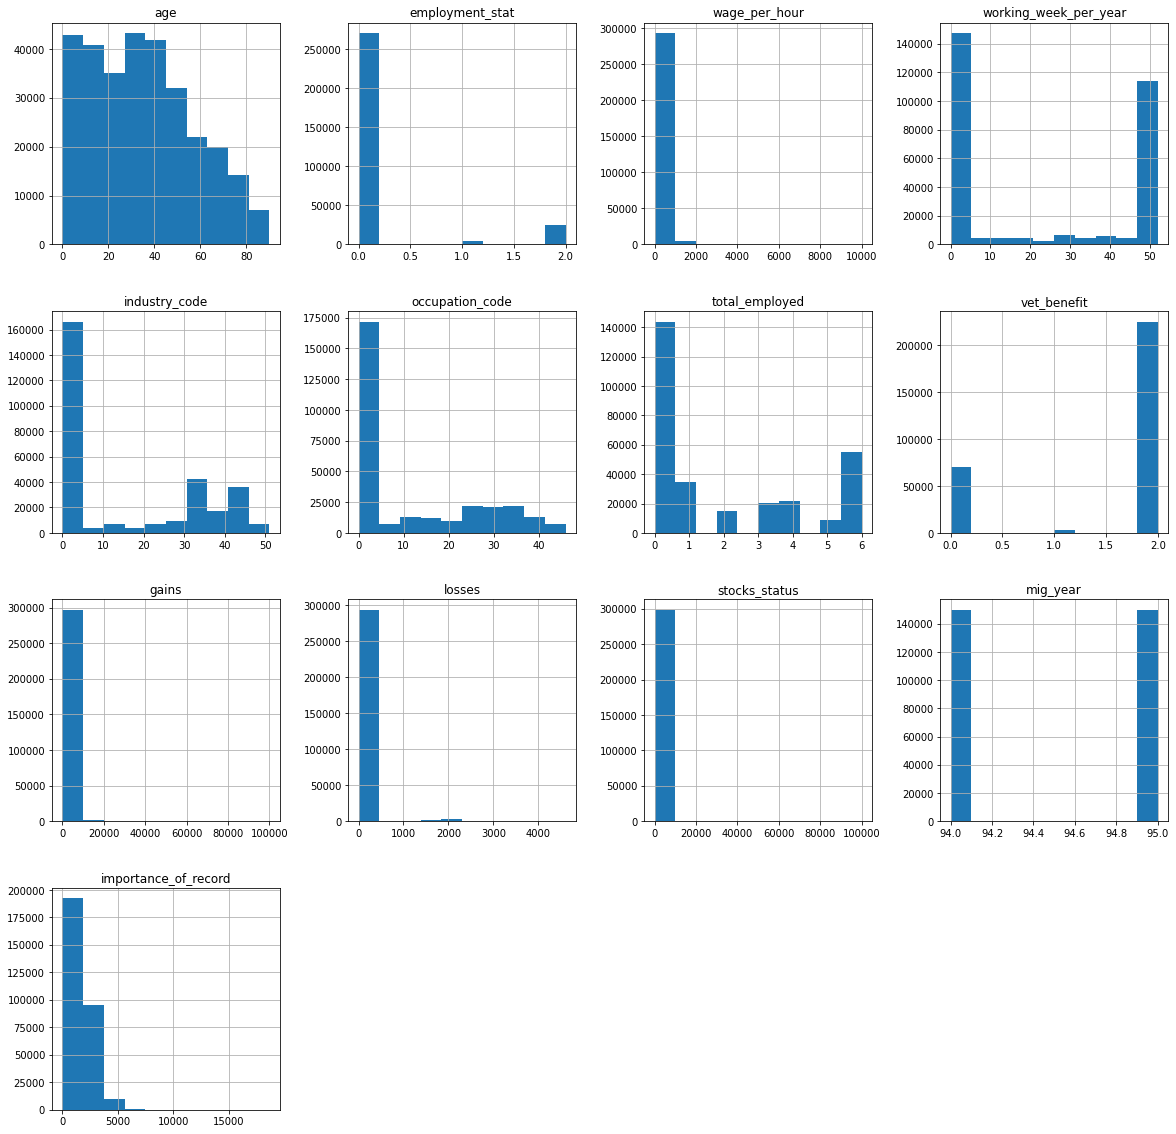

In [ ]:
result.hist(figsize=(20,20))
plt.title("Hisogram plot", size=15, weight='bold')

In [ ]:
result.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [ ]:
df = result[['age','gender','education','marital_status', 'race','employment_commitment','total_employed','wage_per_hour','industry_code_main','occupation_code_main','household_stat','citizenship']].copy()

In [ ]:
df.head()

,age,gender,education,marital_status,race,employment_commitment,total_employed,wage_per_hour,industry_code_main,occupation_code_main,household_stat,citizenship
0,54,Male,High school graduate,Married-civilian spouse present,White,Children or Armed Forces,2,600,Transportation,Transportation and material moving,Householder,Native
1,53,Male,5th or 6th grade,Married-civilian spouse present,White,Full-time schedules,4,0,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,Householder,Foreign born- Not a citizen of U S
2,42,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,Full-time schedules,5,0,Business and repair services,Professional specialty,Householder,Native
3,16,Female,9th grade,Never married,White,Children or Armed Forces,6,0,Not in universe or children,NaN,Child <18 never marr not in subfamily,Native
4,16,Male,9th grade,Never married,White,Not in labor force,0,0,Not in universe or children,NaN,Child <18 never marr not in subfamily,Native


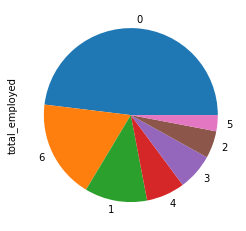

In [ ]:
df['total_employed'].value_counts().plot.pie();

In [ ]:
df_test = test_data[['age','gender','education','marital_status', 'race','employment_commitment','total_employed','wage_per_hour','industry_code_main','household_stat','citizenship']].copy()
df_train = train_data[['age','gender','education','marital_status', 'race','employment_commitment','total_employed','wage_per_hour','industry_code_main','household_stat','citizenship']].copy()

In [ ]:
df_train.columns

Index(['age', 'gender', 'education', 'marital_status', 'race',
       'employment_commitment', 'total_employed', 'wage_per_hour',
       'industry_code_main', 'household_stat', 'citizenship'],
      dtype='object')

In [ ]:
pd.isnull(train_data['income_above_limit']).sum()
target_column_name = ['income_above_limit']
target_column      = train_data[target_column_name]
target_column.head()

,income_above_limit
0,Below limit
1,Below limit
2,Below limit
3,Below limit
4,Below limit


In [ ]:
target_column['income_above_limit'] = target_column['income_above_limit'].map({'Above limit':1,'Below limit':0})
target_column['income_above_limit'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    196501
1     12998
Name: income_above_limit, dtype: int64

In [ ]:
print('The class Imbalance in the data is given below')
display(train_data['income_above_limit'].value_counts())
print('---------------------------------------------------------------\n')
print('The class imbalance in terms of percentage is given below ')
display(train_data['income_above_limit'].value_counts(normalize=True))
print('----------------------------------------------------------------\n')
pct_df = pd.DataFrame(train_data['income_above_limit'].value_counts(normalize=True)).reset_index().rename({'index':'Target_values','income_above_limit':'Percentage'},axis=1)
fig = px.bar(pct_df,x='Target_values',y='Percentage', height=400,width = 400,title='class imbalance')
fig.show()

The class Imbalance in the data is given below


Below limit    196501
Above limit     12998
Name: income_above_limit, dtype: int64

---------------------------------------------------------------

The class imbalance in terms of percentage is given below 


Below limit    0.937957
Above limit    0.062043
Name: income_above_limit, dtype: float64

----------------------------------------------------------------



In [ ]:
# print(colored('We see the distribution of NaN values in train data as below','green',attrs=['bold']))
# nan_value_plot(train_df)

# print('-------------------------------------------------------------------------------------------------')
# print('\n')
# print(colored('We see the distribution of NaN values in test data as below','blue',attrs=['bold']))
# nan_value_plot(test_df)

In [ ]:
X_train, X_test, train_y, y_test = train_test_split(df_train, target_column, test_size=0.2, random_state=42,stratify=target_column)

In [ ]:
cat_cols_index = np.where(df_train.dtypes=='object')[0]
for i in range(len(df_train.columns)):
    if i in cat_cols_index:
        X_train[df_train.columns[i]]   = X_train[df_train.columns[i]].astype(str)
        X_test[df_train.columns[i]]  = X_test[df_train.columns[i]].astype(str)
        df_test[df_train.columns[i]] = df_test[df_train.columns[i]].astype(str)

In [ ]:
model           = CatBoostClassifier(random_state=42,n_estimators =50 )
_               = model.fit(X_train,train_y,cat_features= cat_cols_index)


Learning rate set to 0.5
0:	learn: 0.3962592	total: 124ms	remaining: 6.06s
1:	learn: 0.2837422	total: 224ms	remaining: 5.38s
2:	learn: 0.2305534	total: 306ms	remaining: 4.8s
3:	learn: 0.1894431	total: 424ms	remaining: 4.87s
4:	learn: 0.1704833	total: 511ms	remaining: 4.6s
5:	learn: 0.1610182	total: 599ms	remaining: 4.39s
6:	learn: 0.1541872	total: 680ms	remaining: 4.17s
7:	learn: 0.1500243	total: 765ms	remaining: 4.02s
8:	learn: 0.1476441	total: 865ms	remaining: 3.94s
9:	learn: 0.1466971	total: 945ms	remaining: 3.78s
10:	learn: 0.1458649	total: 1.03s	remaining: 3.66s
11:	learn: 0.1436214	total: 1.11s	remaining: 3.52s
12:	learn: 0.1428050	total: 1.19s	remaining: 3.38s
13:	learn: 0.1424959	total: 1.27s	remaining: 3.28s
14:	learn: 0.1418835	total: 1.35s	remaining: 3.16s
15:	learn: 0.1415878	total: 1.43s	remaining: 3.04s
16:	learn: 0.1414150	total: 1.51s	remaining: 2.94s
17:	learn: 0.1409479	total: 1.6s	remaining: 2.84s
18:	learn: 0.1407417	total: 1.67s	remaining: 2.73s
19:	learn: 0.140659

In [ ]:
acc_valid = accuracy_score(model.predict(X_test),y_test)

print(colored(f'The accuracy attained on the validation set is {acc_valid}','green',attrs=['bold']))


The accuracy attained on the validation set is 0.9460859188544153


In [ ]:
print('\n')
print('The classification report only on the validation data is below-')
print(colored(classification_report(y_test, model.predict(X_test)),'blue',attrs=['bold']))

print('The classification report only on the train data is below-')
print(colored(classification_report(train_y, model.predict(X_train)),'green',attrs=['bold']))



The classification report only on the validation data is below-
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     39300
           1       0.65      0.28      0.40      2600

    accuracy                           0.95     41900
   macro avg       0.80      0.64      0.68     41900
weighted avg       0.94      0.95      0.94     41900

The classification report only on the train data is below-
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    157201
           1       0.67      0.29      0.41     10398

    accuracy                           0.95    167599
   macro avg       0.81      0.64      0.69    167599
weighted avg       0.94      0.95      0.94    167599



In [ ]:
parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

In [ ]:
type(df_train)

pandas.core.frame.DataFrame

In [ ]:
# # Transform categorical features into the appropriate type that is expected by LightGBM
# for c in X.columns:
#   col_type = X[c].dtype
#   if col_type == 'object' or col_type.name == 'category':
#   X[c] = X[c].astype('category')
# #Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
# print('length of X_train and x_test: ', len(X_train), len(X_test))
# print('length of y_train and y_test: ', len(y_train), len(y_test))
# # fit a lightGBM model to the data
# start = time()
# model = lgb.LGBMClassifier(loss_function= 'Logloss', custom_metric=['Accuracy','AUC'],eval_metric='F1')
# model.fit(X_train, y_train, eval_set=(X_test, y_test), feature_name='auto', categorical_feature = 'auto', verbose=50)
# model_elapse = time() - start
# print('elapse:, ', model_elapse)
# print(); print(model)
# # make predictions
# expected_y  = y_test
# y_pred = model.predict(X_test)
# # summarize the fit of the model
# print(); print(metrics.classification_report(expected_y, y_pred))
# print(); print(metrics.confusion_matrix(expected_y, y_pred))

In [ ]:
# for c in df_train.columns:
#   col_type = df_train[c].dtype
#   if col_type == 'object' or col_type.name == 'category':
#     df_train[c] = df_train[c].astype('category')

In [ ]:
df=pd.get_dummies('X_train')
df.head()

,X_train
0,1


In [ ]:
X_train.head()

,age,gender,education,marital_status,race,employment_commitment,total_employed,wage_per_hour,industry_code_main,household_stat,citizenship
107155,79,Female,High school graduate,Widowed,White,Children or Armed Forces,0,0,Not in universe or children,Householder,Native
176215,49,Female,Bachelors degree(BA AB BS),Married-civilian spouse present,Black,Children or Armed Forces,6,0,Education,Spouse of householder,Native
112585,78,Female,High school graduate,Widowed,White,Children or Armed Forces,0,0,Not in universe or children,Nonfamily householder,Native
95985,48,Male,10th grade,Divorced,Asian or Pacific Islander,Full-time schedules,1,0,Retail trade,Nonfamily householder,Foreign born- U S citizen by naturalization
51674,57,Female,Some college but no degree,Married-civilian spouse present,White,Children or Armed Forces,1,0,Retail trade,Spouse of householder,Native


In [ ]:
X_train, X_test, train_y, y_test = train_test_split(df_train, target_column, test_size=0.2, random_state=42,stratify=target_column)

In [ ]:
train_data = lightgbm.Dataset(X_train, label=X_train)
valid_data = lightgbm.Dataset(X_test, label=X_test)

In [ ]:
model_lgbm = lightgbm.train(parameters,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)

ValueError: ignored

In [ ]:
y_train_pred = model_lgbm.predict(X_train)
y_valid_pred = model_lgbm.predict(X_valid)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

In [ ]:
target_column['income_above_limit'] = target_column['income_above_limit'].map({'Above limit':1,'Below limit':0})
target_column['income_above_limit'].value_counts()

In [ ]:
subdf                       = pd.read_csv('drive/MyDrive/ColabNotebooks/SampleSubmission.csv')
var = subdf['income_above_limit'].map({'Above limit':1,'Below limit':0})
subdf['income_above_limit'] = model.predict(df_test)
subdf.to_csv('drive/MyDrive/ColabNotebooks/Sample_submission_1.csv',index=False)
subdf['income_above_limit'].value_counts(normalize=True)

In [ ]:
cleanup = {"income_above_limit":{'Above limit':1,'Below limit':0}}
obj_df = subdf.replace(cleanup)
obj_df.head()

In [ ]:
obj_df.to_csv('drive/MyDrive/ColabNotebooks/Sample_submission_2.csv',index=False)
obj_df['income_above_limit'].value_counts(normalize=True)

In [ ]:
subdf                       = pd.read_csv('drive/MyDrive/ColabNotebooks/SampleSubmission.csv')
var = subdf['income_above_limit'].map({'Above limit':1,'Below limit':0})
subdf['income_above_limit'] = model.predict(df_test)
subdf.to_csv('drive/MyDrive/ColabNotebooks/Sample_submission_2.csv',index=False)
subdf['income_above_limit'].value_counts(normalize=True)

In [ ]:
subdf.head()

In [ ]:
subdf                       = pd.read_csv('drive/MyDrive/ColabNotebooks/SampleSubmission.csv')
var = subdf['income_above_limit'].map({'Above limit':1,'Below limit':0})
var = model.predict(df_test)
subdf.to_csv('drive/MyDrive/ColabNotebooks/Sample_submission_1.csv',index=False)
subdf['income_above_limit'].value_counts(normalize=True)
